<a href="https://colab.research.google.com/github/kapeeshvarma/Appliances-Energy-Prediction/blob/main/Appliances_Energy_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**APPLIANCES ENERGY PREDICTION**

In this time of global uncertainty world needs energy and in increasing quantities to support economic and social progress and build a better quality of life, in particular in developing countries. But even today there are many regions which face constant power outages. These outages are primarily caused due to excess load consumed by home appliances.

Hence, the ability to predict energy consumption can not only save money for end user but can also help in generating money by giving excess energy back to Grid (in case of solar panels usage). In this project, we perform regression analysis in order to predict Appliance energy usage based on data collected from various sensors.

## Importing Data and Modules

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
from sklearn.linear_model import LinearRegression

In [34]:
# Read in the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Appliances Energy Prediction - Kapeesh Varma/data_application_energy.csv')

In [38]:
# Print Summary of the DataFrame
data.info()

# Examine a random sample from the DataFrame
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   T1           19735 non-null  float64       
 3   RH_1         19735 non-null  float64       
 4   T2           19735 non-null  float64       
 5   RH_2         19735 non-null  float64       
 6   T3           19735 non-null  float64       
 7   RH_3         19735 non-null  float64       
 8   T4           19735 non-null  float64       
 9   RH_4         19735 non-null  float64       
 10  T5           19735 non-null  float64       
 11  RH_5         19735 non-null  float64       
 12  T6           19735 non-null  float64       
 13  RH_6         19735 non-null  float64       
 14  T7           19735 non-null  float64       
 15  RH_7         19735 non-null  float64       
 16  T8  

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
10746,2016-03-26 08:00:00,80,21.426667,37.560000,18.166667,42.826667,23.230000,37.73,20.000000,39.29,19.414444,46.720000,5.331250,71.970000,20.700000,38.024545,22.180000,43.148667,19.79,42.500000,6.000000,756.7,82.000000,5.000000,24.000000,3.100000,46.913013,46.913013
15804,2016-04-30 11:00:00,300,21.390000,37.760000,20.260000,38.090000,24.163333,40.89,20.000000,38.79,19.200000,42.590000,12.526667,16.063333,19.200000,33.500000,21.500000,40.526667,19.50,40.700000,8.000000,759.1,78.000000,1.000000,40.000000,4.400000,45.717616,45.717616
2955,2016-02-01 05:30:00,40,21.290000,47.326667,20.390000,47.290000,21.633333,46.70,18.790000,49.20,19.500000,52.200000,10.860000,99.900000,19.011111,51.086111,20.993889,57.500000,17.60,52.900000,10.850000,758.6,92.000000,7.000000,60.000000,9.600000,36.205937,36.205937
1039,2016-01-18 22:10:00,50,20.760000,38.463333,19.700000,38.361667,20.730000,42.03,21.230000,36.36,17.890000,73.226667,-4.400000,84.612222,18.000000,30.890000,20.290000,41.900000,17.00,39.096667,-4.150000,756.6,86.333333,1.833333,27.333333,-6.183333,7.633378,7.633378
12232,2016-04-05 15:40:00,390,22.290000,41.026667,21.200000,40.800000,23.890000,36.29,21.356667,40.40,20.815000,46.647500,15.356667,10.766667,22.500000,35.230000,24.000000,39.566667,21.00,43.363333,13.733333,751.3,63.666667,4.666667,40.000000,6.866667,45.638253,45.638253


## Exploratory Data Analysis & Visualizations

In [10]:
# Look out for Duplicated and Null Values
d2 = data.duplicated()
print(d2.value_counts())

data.isna().sum()

False    19735
dtype: int64


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

We can observe that none of the columns have null-values or duplicates. This is good for Data Analysis!

In [15]:
# Explore Descriptive Statistics
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [35]:
# Drop unwanted columns
data.drop(columns=['lights'],inplace=True)

In [37]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   T1           19735 non-null  float64       
 3   RH_1         19735 non-null  float64       
 4   T2           19735 non-null  float64       
 5   RH_2         19735 non-null  float64       
 6   T3           19735 non-null  float64       
 7   RH_3         19735 non-null  float64       
 8   T4           19735 non-null  float64       
 9   RH_4         19735 non-null  float64       
 10  T5           19735 non-null  float64       
 11  RH_5         19735 non-null  float64       
 12  T6           19735 non-null  float64       
 13  RH_6         19735 non-null  float64       
 14  T7           19735 non-null  float64       
 15  RH_7         19735 non-null  float64       
 16  T8  

In [27]:
# Plot the distribution of Energy Consumption
px.histogram(data, x='Appliances',marginal='box', title='Distribution of Energy Consumption of Appliances')

We can observe that the 'Appliances' column has many outliers. You can hover over the histogram plot to view the InterQuartile Range, Median, Min and Max values of this data column.

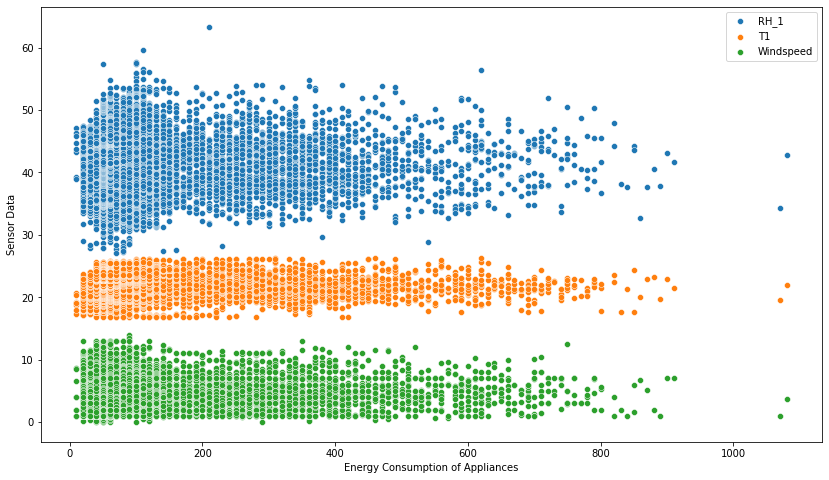

In [64]:
# Visualizing relations between some of the columns through scatter plots
fig, ax = plt.subplots(sharex=True)
fig.set_size_inches(14, 8)

ax = sns.scatterplot(x='Appliances',y='RH_1',data=data)
ax = sns.scatterplot(x='Appliances',y='T1',data=data)
ax = sns.scatterplot(x='Appliances',y='Windspeed',data=data)
ax.set_xlabel('Energy Consumption of Appliances')
ax.set_ylabel('Sensor Data')
ax.legend(['RH_1','T1','Windspeed'])

Clearly, thers is no visible relation between the individual sensor data columns and the Energy consumption of Appliances.